# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=east%20london
Processing Record 2 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=yulara
Processing Record 3 | Zhizdra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=zhizdra
Processing Record 4 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=hobart
Processing Record 5 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=sola
Processing Record 6 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f358e0308edade0c79f958550ed5356f&q=noumea
Processing Record 7 | Vestmannaeyjar
http://api.openweathermap.org/data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [26]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,88,ZA,1547348542,99,-33.02,27.91,72.81,7.07
1,Yulara,0,AU,1547344800,9,-25.24,130.99,105.80,17.22
2,Zhizdra,88,RU,1547348544,92,53.75,34.74,24.12,9.08
3,Hobart,0,AU,1547346600,35,-42.88,147.33,69.80,12.75
4,Sola,0,FI,1547347800,100,62.78,29.36,14.00,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

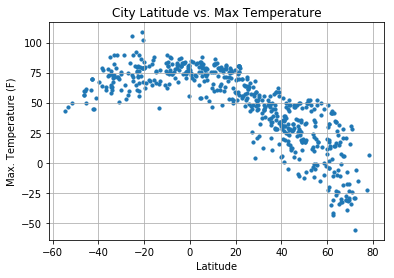

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

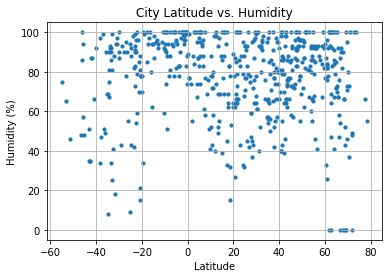

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

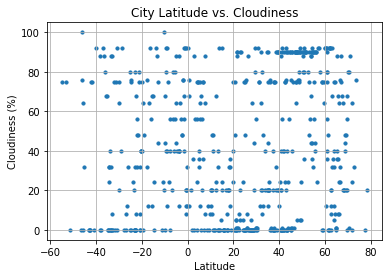

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

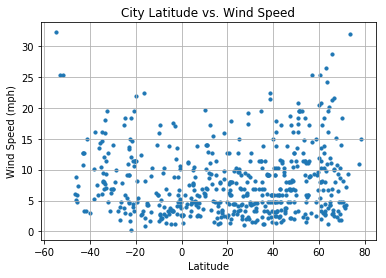

In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()